In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# Commented out IPython magic to ensure Python compatibility.
import seaborn as sns
# %matplotlib inline

print("Versión de librería sklearn: {}".format(sklearn.__version__))

Versión de librería sklearn: 0.22.2.post1


In [2]:
vino = pd.read_csv('/content/winequality-red.csv', header=0, delimiter=';')


In [5]:
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
vino.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0

In [43]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing(vino)


vino.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

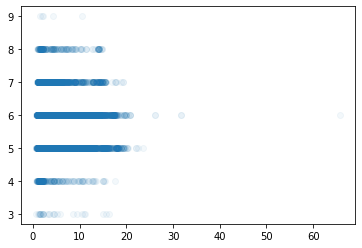

In [17]:
plt.scatter(vino['residual sugar'], vino['quality'],alpha=0.05)

In [18]:
vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Now we will proceed with correlation analysis

In [19]:
vino.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


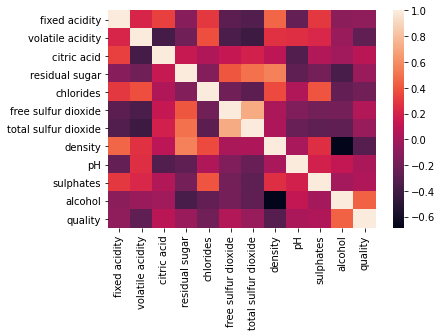

In [20]:
import seaborn as sns
corr = vino.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
X = vino.loc[:,'fixed acidity':'alcohol']
Y = vino.loc[:,'quality']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15)
X_val, X_test_test, Y_val, Y_test = train_test_split(X, Y, test_size=.15)
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_test)))

Datos iniciales		:	1599
	- X_train	:	1359
	- X_test	:	240


In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=len(X_test))

In [11]:
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_val\t\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_val),len(X_test)))

Datos iniciales		:	1599
	- X_train	:	1119
	- X_val		:	240
	- X_test	:	240


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression().fit(X_train,Y_train)

In [14]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.3644311972903636
Bondad del ajuste en Test:	-0.33225638937691837


In [15]:
from sklearn.linear_model import Lasso


In [17]:
model1 = Lasso().fit(X_train,Y_train)

In [18]:
print("Bondad del ajuste en Train:\t{}".format(model1.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model1.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.02983929689610465
Bondad del ajuste en Test:	-0.012937372963398365


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model2 = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, Y)

In [27]:
import tensorflow as tf

In [28]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

We can see that after 15 epochs we reach an accuracy of 76.3% predicting if there such features define Yellow Cab or Pink Cab customers. We will drop income and age. 

In [35]:
target = vino.pop('quality')

In [36]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((vino.values, target.values))

In [38]:
train_dataset = dataset.shuffle(len(vino)).batch(64)

In [39]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [40]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 1ms/step - loss: -11.2816 - accuracy: 0.0000e+00
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: -22.7544 - accuracy: 0.0000e+00
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: -40.0029 - accuracy: 0.0000e+00
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: -63.7418 - accuracy: 0.0000e+00
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: -93.0723 - accuracy: 0.0000e+00
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: -129.9427 - accuracy: 0.0000e+00
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: -176.6251 - accuracy: 0.0000e+00
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: -234.7210 - accuracy: 0.0000e+00
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: -307.0813 - accuracy: 0.0000e+00
Epoch 10/15
25/25 [==============================] - 0s 2ms/

We reach an accuracy of 76.42%, not a good improvement from our former model.

Now we will test the hypothesis of linearity of the relationship between our variables.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# Commented out IPython magic to ensure Python compatibility.
import seaborn as sns
# %matplotlib inline

print("Versión de librería sklearn: {}".format(sklearn.__version__))


Versión de librería sklearn: 0.22.2.post1


In [ ]:
datacab = pd.read_csv('Cab_Data.csv', header=0)
datacity = pd.read_csv('/content/cityedited - City (1).csv', header=0)
datacustomer = pd.read_csv('Customer_ID.csv', header=0)
datatransaction = pd.read_csv('Transaction_ID.csv', header=0)

In [ ]:
transactions = pd.merge(datacab, datatransaction, on='Transaction ID')
transactions

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [ ]:
new = pd.merge(transactions, datacustomer, on='Customer ID')
new

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [ ]:
ally = pd.merge(new, datacity, on='City')
ally

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [ ]:
ally = ally.drop(['Transaction ID', 'Customer ID'],axis=1)
ally

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885,24701
1,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885,24701
2,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885,24701
3,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885,24701
4,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Cash,Female,29,6829,418859,127001
359388,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Cash,Female,29,6829,418859,127001
359389,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Card,Female,29,6829,418859,127001
359390,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Cash,Female,29,6829,418859,127001


In [ ]:
ally['Gender'] = ally['Gender'].map({'Female': 0, 'Male': 1})
ally

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,1,28,10813,814885,24701
1,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,1,28,10813,814885,24701
2,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,1,28,10813,814885,24701
3,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,1,27,9237,814885,24701
4,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,1,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Cash,0,29,6829,418859,127001
359388,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Cash,0,29,6829,418859,127001
359389,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Card,0,29,6829,418859,127001
359390,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Cash,0,29,6829,418859,127001


In [ ]:
ally['Payment_Mode'] = ally['Payment_Mode'].map({'Card': 0, 'Cash': 1})
ally


,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,0,1,28,10813,814885,24701
1,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,1,1,28,10813,814885,24701
2,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,0,1,28,10813,814885,24701
3,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,0,1,27,9237,814885,24701
4,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,0,1,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,1,0,29,6829,418859,127001
359388,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,1,0,29,6829,418859,127001
359389,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,0,0,29,6829,418859,127001
359390,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,1,0,29,6829,418859,127001


In [ ]:
ally['Company'] = ally['Company'].map({'Pink Cab': 0, 'Yellow Cab': 1})
ally

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,0,ATLANTA GA,30.45,370.95,313.6350,0,1,28,10813,814885,24701
1,43302,1,ATLANTA GA,26.19,598.70,317.4228,1,1,28,10813,814885,24701
2,43427,1,ATLANTA GA,42.55,792.05,597.4020,0,1,28,10813,814885,24701
3,42375,0,ATLANTA GA,28.62,358.52,334.8540,0,1,27,9237,814885,24701
4,43211,1,ATLANTA GA,36.38,721.10,467.1192,0,1,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,1,WASHINGTON DC,38.40,668.93,525.3120,1,0,29,6829,418859,127001
359388,43203,1,WASHINGTON DC,3.57,67.60,44.5536,1,0,29,6829,418859,127001
359389,43287,1,WASHINGTON DC,23.46,331.97,337.8240,0,0,29,6829,418859,127001
359390,43314,1,WASHINGTON DC,27.60,358.23,364.3200,1,0,29,6829,418859,127001


In [ ]:
ally['City']= ally['City'].map( {'NEW YORK NY': 0, 'CHICAGO IL': 1, 'LOS ANGELES CA': 2, 'WASHINGTON DC': 3,'BOSTON MA': 4, 'SAN DIEGO CA': 5, 'SILICON VALLEY': 6, 'SEATTLE WA': 7, 'ATLANTA GA': 8, 'DALLAS TX': 9, 'MIAMI FL': 10, 'AUSTIN TX': 11, 'ORANGE COUNTY': 12, 'DENVER CO': 13, 'NASHVILLE TN': 14, 'SACRAMENTO CA': 15, 'PHOENIX AZ': 16, 'TUCSON AZ': 17, 'PITTSBURGH PA': 18})#.astype(int)
ally

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,0,8,30.45,370.95,313.6350,0,1,28,10813,814885,24701
1,43302,1,8,26.19,598.70,317.4228,1,1,28,10813,814885,24701
2,43427,1,8,42.55,792.05,597.4020,0,1,28,10813,814885,24701
3,42375,0,8,28.62,358.52,334.8540,0,1,27,9237,814885,24701
4,43211,1,8,36.38,721.10,467.1192,0,1,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,1,3,38.40,668.93,525.3120,1,0,29,6829,418859,127001
359388,43203,1,3,3.57,67.60,44.5536,1,0,29,6829,418859,127001
359389,43287,1,3,23.46,331.97,337.8240,0,0,29,6829,418859,127001
359390,43314,1,3,27.60,358.23,364.3200,1,0,29,6829,418859,127001


In [ ]:
ally = ally.drop(['Age', 'Date of Travel', 'Income (USD/Month)'],axis=1)
ally

,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Population,Users
0,0,8,30.45,370.95,313.6350,0,1,814885,24701
1,1,8,26.19,598.70,317.4228,1,1,814885,24701
2,1,8,42.55,792.05,597.4020,0,1,814885,24701
3,0,8,28.62,358.52,334.8540,0,1,814885,24701
4,1,8,36.38,721.10,467.1192,0,1,814885,24701
...,...,...,...,...,...,...,...,...,...
359387,1,3,38.40,668.93,525.3120,1,0,418859,127001
359388,1,3,3.57,67.60,44.5536,1,0,418859,127001
359389,1,3,23.46,331.97,337.8240,0,0,418859,127001
359390,1,3,27.60,358.23,364.3200,1,0,418859,127001


In [ ]:
X = ally.drop('Company', axis=1)
Y = ally.Company

In [ ]:
print(Y)

0         0
1         1
2         1
3         0
4         1
         ..
359387    1
359388    1
359389    1
359390    1
359391    1
Name: Company, Length: 359392, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)
X_val, X_test_test, Y_val, Y_test = train_test_split(X, Y, test_size=.20)
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_test)))

Datos iniciales		:	359392
	- X_train	:	287513
	- X_test	:	71879


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=len(X_test))

In [ ]:
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_val\t\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_val),len(X_test)))

Datos iniciales		:	359392
	- X_train	:	215634
	- X_val		:	71879
	- X_test	:	71879


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X_train,Y_train)

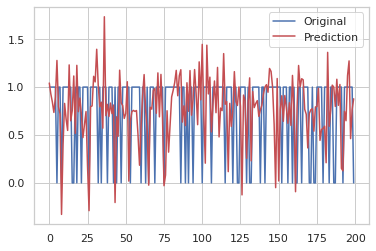

In [ ]:
Y_predict = model.predict(X_test)
plt.plot(np.array(Y_test)[:200],'b')
plt.plot(Y_predict[:200],'r')
plt.legend(['Original', 'Prediction'])
plt.show()

In [ ]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.5326447676786412
Bondad del ajuste en Test:	-0.5407200843456326


We can see that linear regression gives us a bad result: it would explain variability in companies in 53.24%  in train data and worst than taking the average of data in test data (-54.36%). We will proceed to make a Lasso regression.

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0).fit(X_train,Y_train)

In [ ]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.09705466564178611
Bondad del ajuste en Test:	-0.08817346466803033


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)
X_val, X_test_test, Y_val, Y_test = train_test_split(X, Y, test_size=.20)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=len(X_test))
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_test)))

Datos iniciales		:	359392
	- X_train	:	215634
	- X_test	:	71879


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.09640085912178875
Bondad del ajuste en Test:	-0.08515549419635837


We can see that Lasso performs even worst, with train data capable of give correct companies in 9.57% of cases and less than average in test data (-8.06%). Logistic Regression give us similar results (9.64% and -8.51%). We will try to fit the data in KNN to check if we have a better results.


In [ ]:
from sklearn import neighbors
###se utiliza los parámetros default: distancia euclídea y k=5
model = neighbors.KNeighborsClassifier().fit(X_train, Y_train)

#predicción sobre la partición de test
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_sklearn = accuracy_score(Y_test, Y_predict)

print("Acc (sklearn): {}".format(acc_sklearn))
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Acc (sklearn): 0.6622240153591452
Bondad del ajuste en Train:	0.9290928146767208
Bondad del ajuste en Test:	0.6622240153591452


KNN model gave us better results, with an accuracy of 66.71% in test. Let´s try Decision Tree Classifier.

In [ ]:
from sklearn import tree

#árbol de decisión importado con parámetros default
model = tree.DecisionTreeClassifier().fit(X_train,Y_train)

Y_predict = model.predict(X_test)

print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	1.0
Bondad del ajuste en Test:	0.6388514030523519


Results of Decision Tree were worst than KNN, with an accuracy of 63.88% regarding test data. As data is two class problem (yellow cab and pink cab) we will apply a SVM to check if it is better than the other models.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [ ]:
model = svm.SVC().fit(X_train,Y_train)

In [ ]:
Y_predict = model.predict(X_test)
print("Acc: {}".format(accuracy_score(Y_test, Y_predict)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print("Acc: {}".format(accuracy_score(Y_test, Y_predict)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

histogr = {i:list(Y).count(i) for i in set(Y)}
print("La distribución inicial de clases es: {}".format(histogr))

La distribución inicial de clases es: {0: 84711, 1: 274681}


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
#import cross validation
from sklearn.model_selection import cross_val_score

#create a classificator which is a decision tree with its default parameters
todo_CV = tree.DecisionTreeClassifier()

#we cross validate in 10 partitions
scores = cross_val_score(todo_CV, X, Y, cv=10)

#show the results for each partition
print(scores)

#we include make_scorer that balances the classes instead of sklearn 
from sklearn.metrics import make_scorer

#we use the same cross validation with k=10 but using the metric F1 under class 0 
scores = cross_val_score(todo_CV, X, Y, cv=10, scoring=make_scorer(f1_score, average='weighted'))

#we show the results for each partition
print(scores)

[0.98266555 0.984335   0.98436239 0.98422327 0.98341634 0.98316592
 0.98386154 0.98233117 0.97999388 0.97359415]
[0.98269837 0.98455302 0.98403406 0.9846372  0.98332987 0.98305391
 0.98337153 0.98234876 0.97953086 0.97366969]


KFold(n_splits=10, random_state=None, shuffle=False)
fold:  0
F1 score: 0.9837435662233094
Acc: 0.973372287145242


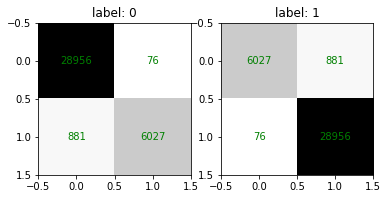

F1 calculado 0.9837435662233094
fold:  1
F1 score: 0.985051221299879
Acc: 0.9755982192543128


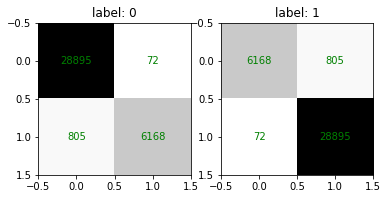

F1 calculado 0.985051221299879
fold:  2
F1 score: 0.985977809543258
Acc: 0.9770722613317009


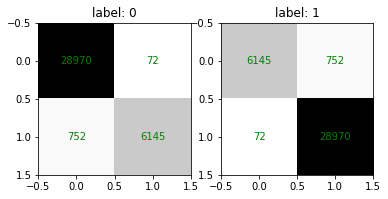

F1 calculado 0.985977809543258
fold:  3
F1 score: 0.9863070467770622
Acc: 0.977934834024319


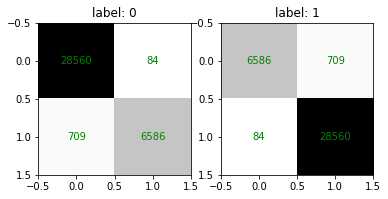

F1 calculado 0.9863070467770622
fold:  4
F1 score: 0.9849434950385888
Acc: 0.9756810150532848


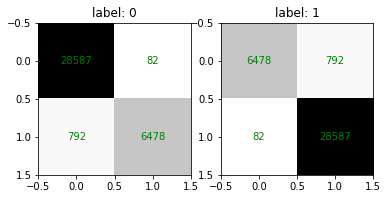

F1 calculado 0.9849434950385888
fold:  5
F1 score: 0.9835005302780048
Acc: 0.9735941456356604


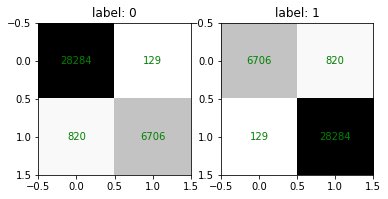

F1 calculado 0.9835005302780048
fold:  6
F1 score: 0.9846054588791914
Acc: 0.9760983889368096


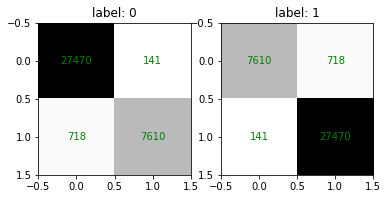

F1 calculado 0.9846054588791914
fold:  7
F1 score: 0.9817321592850572
Acc: 0.9729263474220207


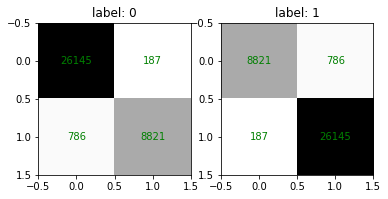

F1 calculado 0.9817321592850572
fold:  8
F1 score: 0.9735426718342166
Acc: 0.9627702495895823


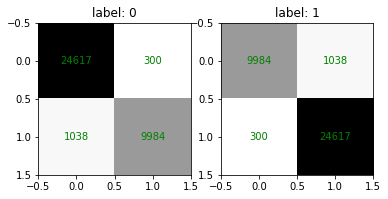

F1 calculado 0.9735426718342166
fold:  9
F1 score: 0.966195794302373
Acc: 0.9561200923787528


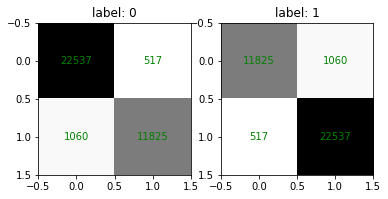

F1 calculado 0.966195794302373


In [ ]:
#we do the same for randomforest and make a cross validation matrix 

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)
k=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    model = RandomForestClassifier().fit(X_train, y_train)
    Y_predict = model.predict(X_test)
    print('fold: ',k)
    print("F1 score: {}".format(f1_score(y_test, Y_predict,pos_label=1, average='binary')))
    print("Acc: {}".format(accuracy_score(y_test, Y_predict)))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.imshow(multilabel_confusion_matrix(y_test, Y_predict)[0], cmap='binary')
    ax1.set_title('label: 0')
    for i in range(2):
        for j in range(2):
            text = ax1.text(j, i, multilabel_confusion_matrix(y_test, Y_predict)[0][i, j],
                       ha="center", va="center", color="g")
    ax2.imshow(multilabel_confusion_matrix(y_test, Y_predict)[1], cmap='binary')
    ax2.set_title('label: 1')
    for i in range(2):
        for j in range(2):
            text = ax2.text(j, i, multilabel_confusion_matrix(y_test, Y_predict)[1][i, j],
                       ha="center", va="center", color="g")
    plt.show()
    
    TN = multilabel_confusion_matrix(y_test, Y_predict)[1][0,0]
    FP = multilabel_confusion_matrix(y_test, Y_predict)[1][0,1]
    FN = multilabel_confusion_matrix(y_test, Y_predict)[1][1,0]
    TP = multilabel_confusion_matrix(y_test, Y_predict)[1][1,1]
    
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    f1_calculado = 2 * (precision * recall) / (precision + recall)
    print('F1 calculado', f1_calculado)
    
    k += 1

In [ ]:
kf = KFold(n_splits=10, shuffle = True)
kf.get_n_splits(X)

print(kf)
k= 1
F1 = 0
acc = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    model = neighbors.KNeighborsClassifier().fit(X_train, y_train)
    Y_predict = model.predict(X_test)
    print('fold: ',k)
    print("F1 score: {}".format(f1_score(y_test, Y_predict,pos_label=1, average='binary')))
    print("Acc: {}".format(accuracy_score(y_test, Y_predict)))
    F1 += f1_score(y_test, Y_predict,pos_label=1, average='binary')
    acc += accuracy_score(y_test, Y_predict)

    k += 1

print('mean F1', F1/k)
print('mean Acc', acc/k)

KFold(n_splits=10, random_state=None, shuffle=True)
fold:  1
F1 score: 0.833344709897611
Acc: 0.7282693377851975
fold:  2
F1 score: 0.8330748120749313
Acc: 0.7275180856983862
fold:  3
F1 score: 0.8317095682494103
Acc: 0.7260357828542808
fold:  4
F1 score: 0.8316997656557364
Acc: 0.7262305573332591
fold:  5
F1 score: 0.8355146557600545
Acc: 0.7314338184145357
fold:  6
F1 score: 0.8360946947699245
Acc: 0.7329920142463618
fold:  7
F1 score: 0.8335896121647017
Acc: 0.7289852249645232
fold:  8
F1 score: 0.8345826235093697
Acc: 0.729819972731573
fold:  9
F1 score: 0.8362473637662426
Acc: 0.7321016166281755
fold:  10
F1 score: 0.8294736842105263
Acc: 0.7227802665627869
mean F1 0.7577574081871372
mean Acc 0.6623787888380982


From the analysis above we have scores to predict which company belongs a determined user regarding its characteristics we have mean F1 ranging from 75.77% (knn) to 97.3 in random forest, which provides us a better response. We will proceed to make a k-means analysis to see if there is a clear difference between companies. 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=2)
  clusters.fit(todo)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.289558e+13
1,2,6.827597e+12
2,3,3.475301e+12
3,4,1.939345e+12
4,5,1.199122e+12
5,6,8.435694e+11
6,7,6.492294e+11
7,8,5.317940e+11
8,9,4.292571e+11


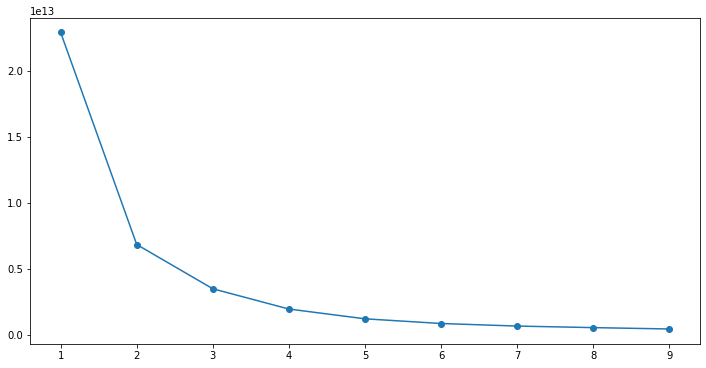

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

kmeans = KMeans(n_clusters=4, n_init = 20, random_state=4)
kmeans.fit(todo)

centroids=kmeans.cluster_centers_


# creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

Ideal number of clusters is 2, thus we will cluster in 2 groups. We can see next if they refer to company 0 and company 1.

In [ ]:
model_clus5 = KMeans(n_clusters = 2, max_iter=50)
model_clus5.fit(todo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=42)
clusters = kmeans.fit_predict(todo)
df_k = todo.copy(deep=True)
df_k['label'] = clusters

In [ ]:
df_k

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),label
0,42377,0,8,30.45,370.95,313.6350,1,28,10813,0
1,43302,1,8,26.19,598.70,317.4228,1,28,10813,0
2,43427,1,8,42.55,792.05,597.4020,1,28,10813,0
3,42375,0,8,28.62,358.52,334.8540,1,27,9237,0
4,43211,1,8,36.38,721.10,467.1192,1,27,9237,0
...,...,...,...,...,...,...,...,...,...,...
359387,43107,1,7,16.66,261.18,213.9144,0,42,19417,1
359388,43103,1,6,13.72,277.97,172.8720,1,33,18713,1
359389,43104,1,17,19.00,303.77,232.5600,1,38,3960,0
359390,43106,1,17,5.60,92.42,70.5600,1,23,19454,1


In [ ]:
 df_k[df_k.loc[:,'label']==0].mean()

Date of Travel        42964.368371
Company                   0.764613
City                      3.150859
KM Travelled             22.572440
Price Charged           421.925214
Cost of Trip            286.278816
Gender                    0.572896
Age                      35.247821
Income (USD/Month)     8731.114989
label                     0.000000
dtype: float64

In [ ]:
 df_k[df_k.loc[:,'label']==1].mean()

Date of Travel        42963.731537
Company                   0.763936
City                      3.070944
KM Travelled             22.561445
Price Charged           425.143799
Cost of Trip            286.090752
Gender                    0.573000
Age                      35.436267
Income (USD/Month)    22125.566712
label                     1.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
def reduce_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    X = scaler.transform(data)
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    return X, pca

In [ ]:
def get_kmeans(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    return centroids, labels

In [ ]:
def biplot(data, directions, labels, country_names, centroids, var_names):
    xs = data[:,0]
    ys = data[:,1]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.tight_layout()  
    

In [ ]:
def biplot(data, directions, labels, country_names, centroids, var_names):
    xs = data[:,0]
    ys = data[:,1]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.tight_layout()  
    
    # plot country points
    plt.scatter(xs * scalex,ys * scaley, c = labels, s=200)
    # plot centroids 
    plt.scatter(centroids[:, 0] * scalex, centroids[:, 1] * scaley, c='r', marker='x', s=500)
    
    # print country names 
    for i in range(len(Company_names)):
        plt.text(xs[i] * scalex, ys[i] * scaley + 0.01, Company_names[i], color = 'black', fontsize=12)
    
    # draw variable directions
    for i in range(directions.shape[0]):
        if i != 1:
            plt.arrow(0, 0, directions[i,0] * 0.3, directions[i,1] * 0.3, color = 'r',alpha = 0.5)
            plt.text(directions[i,0]* 0.35, directions[i,1] * 0.35, var_names[i], color = 'g', fontsize=10, ha = 'center', va = 'center')

In [ ]:
def biplot(data, directions, labels, country_names, centroids, var_names):
 xs = data[:,0]
 ys = data[:,1]
    
 scalex = 1.0/(xs.max() - xs.min())
 scaley = 1.0/(ys.max() - ys.min())

 plt.tight_layout()  
 plt.scatter(xs * scalex, ys * scaley, c = labels, s=200)
 plt.scatter(centroids[:, 0] * scalex, centroids[:, 1] * scaley, c='r', marker='x', s=500)
 for i in range(len(todo_names)):
  plt.text(xs[i] * scalex, ys[i] * scaley + 0.01, todo_names[i], 
          color = 'black', fontsize=12)
 for i in range(directions.shape[0]):
  if i != 1:
   plt.arrow(0, 0, directions[i,0] * 0.3, directions[i,1] * 0.3, 
            color = 'r', alpha = 0.5)
   plt.text(directions[i,0]* 0.35, directions[i,1] * 0.35, var_names[i], color = 'g', fontsize=10, ha = 'center', va = 'center')

In [ ]:
import tensorflow as tf

In [ ]:
#Importamos el método:
from sklearn.cluster import KMeans

#Inicializamos el algoritmo pasando los parámetros especificados:
kmeans = KMeans(n_clusters=2, init='random')

#Realizamos el proceso de clustering sobre los datos X_clust:
clustering = kmeans.fit(X)

In [ ]:
#Comprobamos que únicamente hay tantos clusters como se ha especificado:
print("El número de clusters diferentes es: {}\n".format(clustering.n_clusters))

#Por otro lado vamos a comprobar las asignaciones de los 10 primeros elementos:
print("Assignments of the first 10 elements:")
for it_sample in range(10):
  print("\t- Element {} from X_test is assigned to cluster {}".format(it_sample,clustering.labels_[it_sample]))

El número de clusters diferentes es: 2

Assignments of the first 10 elements:
	- Element 0 from X_test is assigned to cluster 1
	- Element 1 from X_test is assigned to cluster 1
	- Element 2 from X_test is assigned to cluster 1
	- Element 3 from X_test is assigned to cluster 1
	- Element 4 from X_test is assigned to cluster 1
	- Element 5 from X_test is assigned to cluster 1
	- Element 6 from X_test is assigned to cluster 1
	- Element 7 from X_test is assigned to cluster 1
	- Element 8 from X_test is assigned to cluster 1
	- Element 9 from X_test is assigned to cluster 1


In [ ]:
#Inicializamos PCA a una salida de 2 dimensiones:
PCA_Mapping = PCA(n_components=2).fit(X)

#Mapeamos los datos:
X_clust_PCA = PCA_Mapping.transform(X)

In [ ]:
#Inicializamos el algoritmo (5 clusters) y realizamos el clustering:
clustering_PCA = KMeans(n_clusters = 2, init='k-means++').fit(X_clust_PCA)

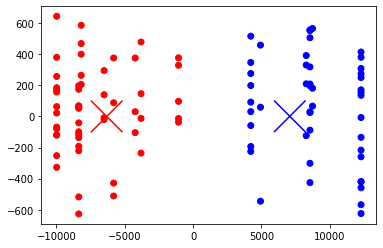

In [ ]:
#Importamos la librería gráfica:
import matplotlib.pyplot as plt

#Vector de colores:
colors = ['blue','red']

# #Mostramos los datos en crudo:
# plt.subplot(2,1,1)
# plt.scatter(X_clust_PCA[:100,0], X_clust_PCA[:100,1])
# plt.subplot(2,1,2)

#Mostramos los datos, siendo el color lo que representa su pertenencia a cada cluster:
plt.scatter(X_clust_PCA[:100,0], X_clust_PCA[:100,1], c=[colors[u] for u in clustering_PCA.labels_[:100]])

#Mostramos los centroides de cada uno de los clusters:
plt.scatter(clustering_PCA.cluster_centers_[:,0], clustering_PCA.cluster_centers_[:,1], c=colors, marker='x', s=1000)


plt.show()

We can see they can be grouped in two clearly different group but this is not due they are part of two companies (yellow cab and pink cab) but because of income, which is very different from group 0 to group 1. Other indicators are very similar. 

Regarding costs, we can see that the cost per km for the pink company is 1.10 USD whilst profit is 0.27 USD per km. Regarding yellow company cost per km is 1.32 USD whilst benefit per km is 0.71 USD.

In [ ]:
% pip install pulp            # PuLP
% pip install glpk-utils  # GLPK

ERROR: Could not find a version that satisfies the requirement glpk-utils (from versions: none)
ERROR: No matching distribution found for glpk-utils


In [ ]:
from pulp import *

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
prob = LpProblem('Simple_Problem', LpMinimize)

In [ ]:
datacab = pd.read_csv('/content/Cab_Data.csv', header=0)
datacustomer = pd.read_csv('/content/Customer_ID.csv', header=0)
datacity = pd.read_csv('/content/City.csv', header=0)
datatransaction = pd.read_csv('/content/Transaction_ID.csv', header=0)

In [ ]:
transactions = pd.merge(datacab, datatransaction, on='Transaction ID')
transactions

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [ ]:
new = pd.merge(transactions, datacustomer, on='Customer ID')
new

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [ ]:
ally = pd.merge(new, datacity, on='City')
ally

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [ ]:
ally['City']= ally['City'].map( {'NEW YORK NY': 0, 'CHICAGO IL': 1, 'LOS ANGELES CA': 2, 'WASHINGTON DC': 3,'BOSTON MA': 4, 'SAN DIEGO CA': 5, 'SILICON VALLEY': 6, 'SEATTLE WA': 7, 'ATLANTA GA': 8, 'DALLAS TX': 9, 'MIAMI FL': 10, 'AUSTIN TX': 11, 'ORANGE COUNTY': 12, 'DENVER CO': 13, 'NASHVILLE TN': 14, 'SACRAMENTO CA': 15, 'PHOENIX AZ': 16, 'TUCSON AZ': 17, 'PITTSBURGH PA': 18})#.astype(int)
ally

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,8,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,8,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,8,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,8,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,8,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,3,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,3,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,3,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,3,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [ ]:
ally['Gender'] = ally['Gender'].map({'Female': 0, 'Male': 1})
ally

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,8,30.45,370.95,313.6350,29290,Card,1,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,8,26.19,598.70,317.4228,29290,Cash,1,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,8,42.55,792.05,597.4020,29290,Card,1,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,8,28.62,358.52,334.8540,27703,Card,1,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,8,36.38,721.10,467.1192,27703,Card,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,3,38.40,668.93,525.3120,51406,Cash,0,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,3,3.57,67.60,44.5536,51406,Cash,0,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,3,23.46,331.97,337.8240,51406,Card,0,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,3,27.60,358.23,364.3200,51406,Cash,0,29,6829,"418,859","127,001"


In [ ]:
ally = ally.drop(['Transaction ID'],axis=1)
ally

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,Pink Cab,8,30.45,370.95,313.6350,29290,Card,1,28,10813,"814,885","24,701"
1,43302,Yellow Cab,8,26.19,598.70,317.4228,29290,Cash,1,28,10813,"814,885","24,701"
2,43427,Yellow Cab,8,42.55,792.05,597.4020,29290,Card,1,28,10813,"814,885","24,701"
3,42375,Pink Cab,8,28.62,358.52,334.8540,27703,Card,1,27,9237,"814,885","24,701"
4,43211,Yellow Cab,8,36.38,721.10,467.1192,27703,Card,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,43162,Yellow Cab,3,38.40,668.93,525.3120,51406,Cash,0,29,6829,"418,859","127,001"
359388,43203,Yellow Cab,3,3.57,67.60,44.5536,51406,Cash,0,29,6829,"418,859","127,001"
359389,43287,Yellow Cab,3,23.46,331.97,337.8240,51406,Card,0,29,6829,"418,859","127,001"
359390,43314,Yellow Cab,3,27.60,358.23,364.3200,51406,Cash,0,29,6829,"418,859","127,001"


In [ ]:
ally = ally.drop(['Date of Travel'],axis=1)
ally

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,Pink Cab,8,30.45,370.95,313.6350,29290,Card,1,28,10813,"814,885","24,701"
1,Yellow Cab,8,26.19,598.70,317.4228,29290,Cash,1,28,10813,"814,885","24,701"
2,Yellow Cab,8,42.55,792.05,597.4020,29290,Card,1,28,10813,"814,885","24,701"
3,Pink Cab,8,28.62,358.52,334.8540,27703,Card,1,27,9237,"814,885","24,701"
4,Yellow Cab,8,36.38,721.10,467.1192,27703,Card,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,3,38.40,668.93,525.3120,51406,Cash,0,29,6829,"418,859","127,001"
359388,Yellow Cab,3,3.57,67.60,44.5536,51406,Cash,0,29,6829,"418,859","127,001"
359389,Yellow Cab,3,23.46,331.97,337.8240,51406,Card,0,29,6829,"418,859","127,001"
359390,Yellow Cab,3,27.60,358.23,364.3200,51406,Cash,0,29,6829,"418,859","127,001"


In [ ]:
ally = ally.drop(['Customer ID'],axis=1)
ally

,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,Pink Cab,8,30.45,370.95,313.6350,Card,1,28,10813,"814,885","24,701"
1,Yellow Cab,8,26.19,598.70,317.4228,Cash,1,28,10813,"814,885","24,701"
2,Yellow Cab,8,42.55,792.05,597.4020,Card,1,28,10813,"814,885","24,701"
3,Pink Cab,8,28.62,358.52,334.8540,Card,1,27,9237,"814,885","24,701"
4,Yellow Cab,8,36.38,721.10,467.1192,Card,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,3,38.40,668.93,525.3120,Cash,0,29,6829,"418,859","127,001"
359388,Yellow Cab,3,3.57,67.60,44.5536,Cash,0,29,6829,"418,859","127,001"
359389,Yellow Cab,3,23.46,331.97,337.8240,Card,0,29,6829,"418,859","127,001"
359390,Yellow Cab,3,27.60,358.23,364.3200,Cash,0,29,6829,"418,859","127,001"


In [ ]:
ally = ally.drop(['Payment_Mode'],axis=1)
ally

,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,Pink Cab,8,30.45,370.95,313.6350,1,28,10813,"814,885","24,701"
1,Yellow Cab,8,26.19,598.70,317.4228,1,28,10813,"814,885","24,701"
2,Yellow Cab,8,42.55,792.05,597.4020,1,28,10813,"814,885","24,701"
3,Pink Cab,8,28.62,358.52,334.8540,1,27,9237,"814,885","24,701"
4,Yellow Cab,8,36.38,721.10,467.1192,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,3,38.40,668.93,525.3120,0,29,6829,"418,859","127,001"
359388,Yellow Cab,3,3.57,67.60,44.5536,0,29,6829,"418,859","127,001"
359389,Yellow Cab,3,23.46,331.97,337.8240,0,29,6829,"418,859","127,001"
359390,Yellow Cab,3,27.60,358.23,364.3200,0,29,6829,"418,859","127,001"


In [ ]:
cabitens = list(ally['Price Charged'])

In [ ]:
costs = dict(zip(cabitens, ally['Cost of Trip']))

In [ ]:
quantity = dict(zip(cabitens, ally['Users']))

In [ ]:
costis = dict(zip(cabitens, ally['Price Charged']))

In [ ]:
distance = dict(zip(cabitens, new['KM Travelled']))

In [ ]:
company = dict(zip(cabitens, ally['Company']))

In [ ]:
total = LpVariable.dicts("total", cabitens,lowBound=0,cat='Continuous')

In [ ]:
prob += lpSum([costs[i]*total[i] for i in cabitens])

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1537: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [ ]:
prob.solve()

1

In [ ]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [ ]:
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

In [ ]:
obj = value(prob.objective)
print("results: ${}".format(round(obj,2)))

results: $0.0


In [ ]:
ally['Company'] = ally['Company'].map({'Yellow Cab': 0, 'Pink Cab': 1,})
ally

,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,1,8,30.45,370.95,313.6350,1,28,10813,"814,885","24,701"
1,0,8,26.19,598.70,317.4228,1,28,10813,"814,885","24,701"
2,0,8,42.55,792.05,597.4020,1,28,10813,"814,885","24,701"
3,1,8,28.62,358.52,334.8540,1,27,9237,"814,885","24,701"
4,0,8,36.38,721.10,467.1192,1,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...
359387,0,3,38.40,668.93,525.3120,0,29,6829,"418,859","127,001"
359388,0,3,3.57,67.60,44.5536,0,29,6829,"418,859","127,001"
359389,0,3,23.46,331.97,337.8240,0,29,6829,"418,859","127,001"
359390,0,3,27.60,358.23,364.3200,0,29,6829,"418,859","127,001"


In [ ]:
cabitens = LpVariable.dicts("Chosen",cabitens,0,1,cat='Integer')

In [ ]:
for f in cabitens:
    prob += cabitens[f]>= cabitens[f]*0.1
    prob += cabitens[f]<= cabitens[f]*1e5

In [ ]:
prob.solve()

1

After applying a linear programming to minimize costs, we can see that the optimal solution would be costs minimized to 1 and that would would pick company pink. 

In [ ]:
pip install HyperclassifierSearch

  Created wheel for HyperclassifierSearch: filename=HyperclassifierSearch-1.0-cp37-none-any.whl size=3850 sha256=59f401a3627afe93011d0f4188eba8f211ad2f2a0fc51eb036654f9b0de4e3a2
  Stored in directory: /root/.cache/pip/wheels/22/cf/5c/fda0f48da469edf4531fcc01fd80e9ce9082160988b52121b6
Successfully built HyperclassifierSearch


In [ ]:
# import the package HyperclassifierSearch (after e.g. 'pip install HyperclassifierSearch')
from HyperclassifierSearch import HyperclassifierSearch

In [ ]:
best_model.best_score_
best_model.best_estimator_

In [ ]:
search.evaluate_model()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
country = pd.read_csv('/content/eficiencias completas - Hoja 1.csv', header=0, decimal=',')

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Distribución de los scores de eficiencia')

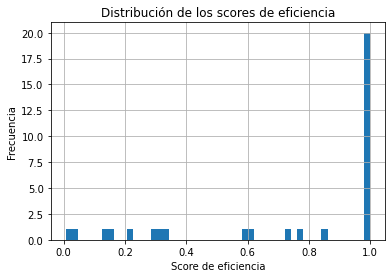

In [ ]:
country['VRS'].hist(bins=50)
plt.ylabel('Frecuencia')
plt.xlabel('Score de eficiencia')
plt.title('Distribución de los scores de eficiencia')

In [ ]:
country

,DMU,CRS,VRS,Escala,Número de veces tomada como referencia,DMUsin,CRSsin,VRSsin,Escalasin,número de veces
0,Alemania,1.000,1.000,1.000000,9,Uruguay,0.054,1.000,0.054000,17
1,Uruguay,0.063,1.000,0.063000,9,Portugal,1.000,1.000,1.000000,13
2,Reino Unido,1.000,1.000,1.000000,7,Reino Unido,1.000,1.000,1.000000,11
3,Serbia,1.000,1.000,1.000000,7,Alemania,1.000,1.000,1.000000,7
4,Portugal,1.000,1.000,1.000000,6,Suecia,0.493,1.000,0.493000,6
5,Croacia,1.000,1.000,1.000000,4,Suiza,1.000,1.000,1.000000,6
6,Estados Unidos,1.000,1.000,1.000000,3,Letonia,1.000,1.000,1.000000,5
7,Países Bajos,1.000,1.000,1.000000,3,Perú,0.129,1.000,0.129000,3
8,Perú,0.233,1.000,0.233000,3,Brasil,0.127,1.000,0.127000,1
9,Suecia,0.641,1.000,0.641000,3,Serbia,0.079,1.000,0.079000,1


Text(0.5, 1.0, 'Distribución de los scores de eficiencia Escala')

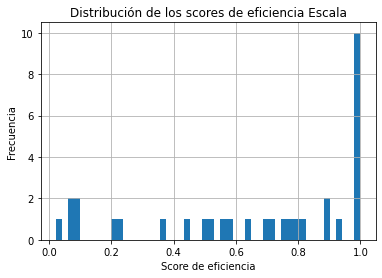

In [ ]:
country['Escala'].hist(bins=50)
plt.ylabel('Frecuencia')
plt.xlabel('Score de eficiencia')
plt.title('Distribución de los scores de eficiencia Escala')